# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

In [138]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [139]:
satisfaction = pd.read_csv("data.csv")
satisfaction_df = pd.DataFrame(satisfaction)

a, b = satisfaction_df.shape
print("Length of DataFrame:", a)
satisfaction_df.head(5)

Length of DataFrame: 1735


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [140]:
satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       1735 non-null   object 
 1   Gender                             1735 non-null   object 
 2   Customer Type                      1735 non-null   object 
 3   Age                                1735 non-null   int64  
 4   Type of Travel                     1735 non-null   object 
 5   Class                              1735 non-null   object 
 6   Flight Distance                    1735 non-null   int64  
 7   Seat comfort                       1735 non-null   int64  
 8   Departure/Arrival time convenient  1735 non-null   int64  
 9   Food and drink                     1735 non-null   int64  
 10  Gate location                      1735 non-null   int64  
 11  Inflight wifi service              1735 non-null   int64

In [141]:
satisfaction_df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             5
dtype: int64

Now I want see our data as visualized, I will do it beacause I want understand data well. I mean that which feature have which values and how many are there. I should understand before beginning to predict.

In [142]:
columnsAsCategorical = ["Gender", "Customer Type", "Type of Travel", "Class", "Seat comfort", 
                        "Departure/Arrival time convenient", "Food and drink" ,"Gate location",
                        "Inflight wifi service", "Inflight entertainment", "Online support",
                        "Ease of Online booking", "On-board service", "Leg room service", 
                        "Baggage handling" ,"Checkin service", "Cleanliness","Online boarding"]

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, features, satisfaction):
    
    "Function for visualization of categorical variables."
    
    variable = df[features]
    values=variable.value_counts()
    
    f, ax = plt.subplots(figsize = (8,8))
    sns.countplot(x = features, hue = satisfaction, data = df)
    
    plt.show()
    
    print("{}:\n{}".format(features, values))

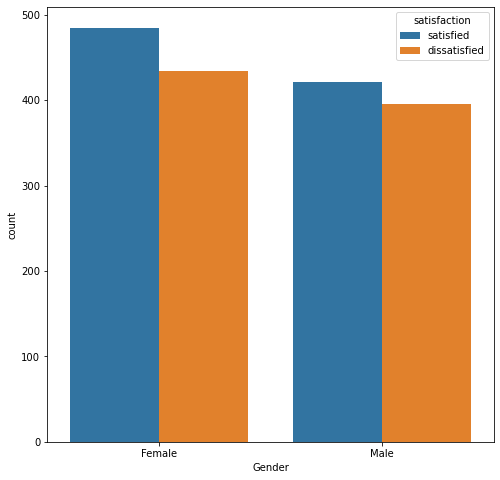

Gender:
Female    919
Male      816
Name: Gender, dtype: int64


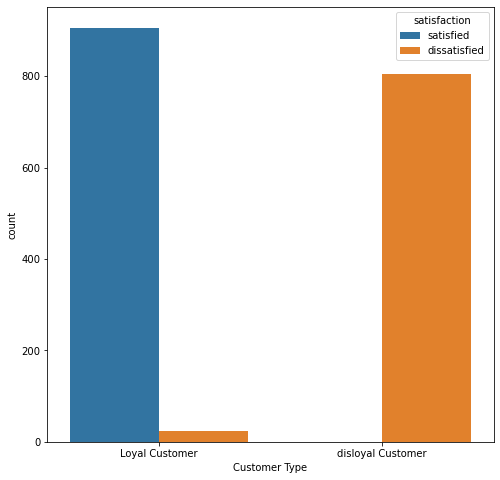

Customer Type:
Loyal Customer       930
disloyal Customer    805
Name: Customer Type, dtype: int64


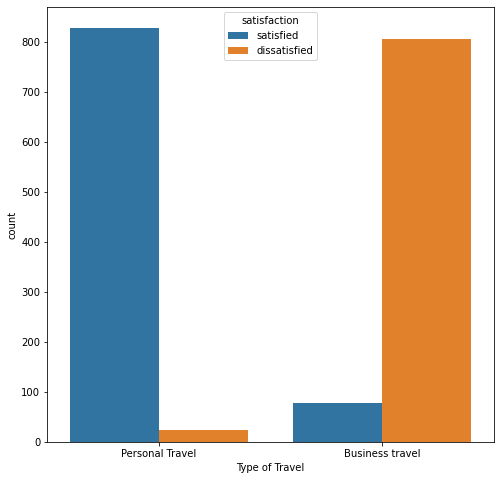

Type of Travel:
Business travel    883
Personal Travel    852
Name: Type of Travel, dtype: int64


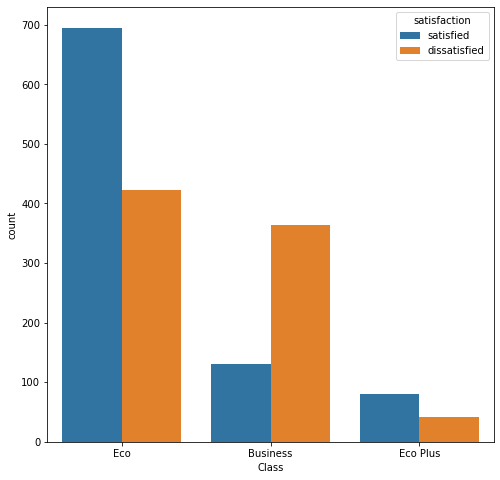

Class:
Eco         1118
Business     494
Eco Plus     123
Name: Class, dtype: int64


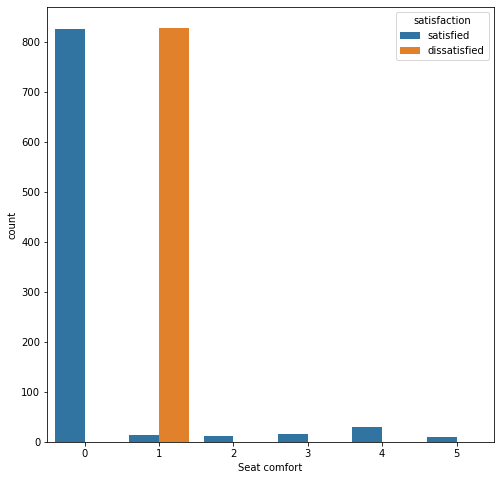

Seat comfort:
1    842
0    827
4     30
3     15
2     11
5     10
Name: Seat comfort, dtype: int64


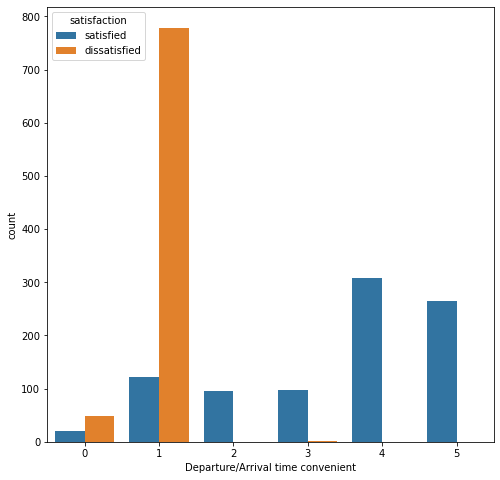

Departure/Arrival time convenient:
1    901
4    308
5    264
3     98
2     95
0     69
Name: Departure/Arrival time convenient, dtype: int64


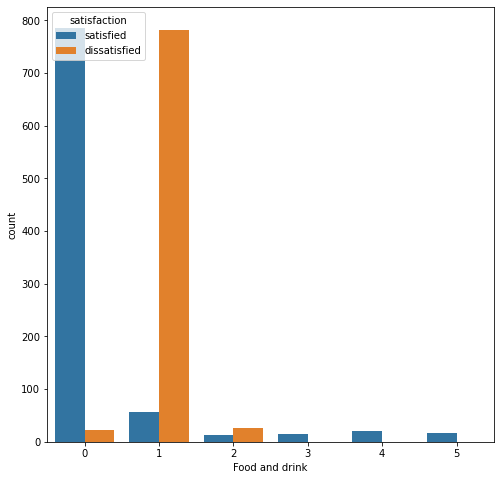

Food and drink:
1    837
0    808
2     39
4     20
5     17
3     14
Name: Food and drink, dtype: int64


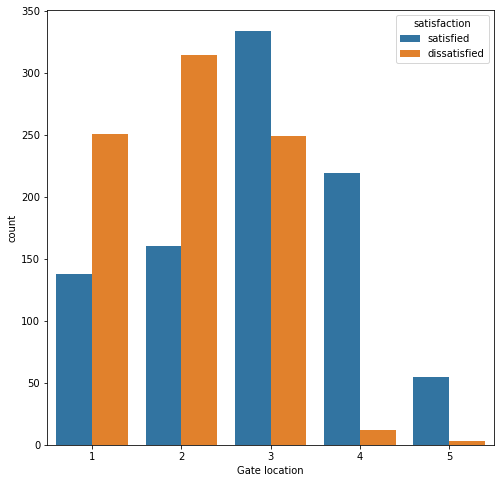

Gate location:
3    583
2    474
1    389
4    231
5     58
Name: Gate location, dtype: int64


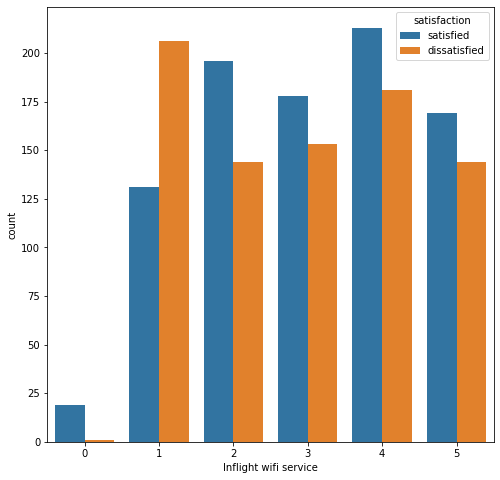

Inflight wifi service:
4    394
2    340
1    337
3    331
5    313
0     20
Name: Inflight wifi service, dtype: int64


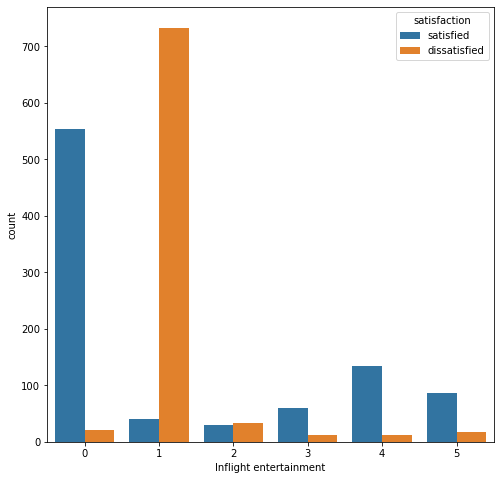

Inflight entertainment:
1    774
0    575
4    147
5    103
3     72
2     64
Name: Inflight entertainment, dtype: int64


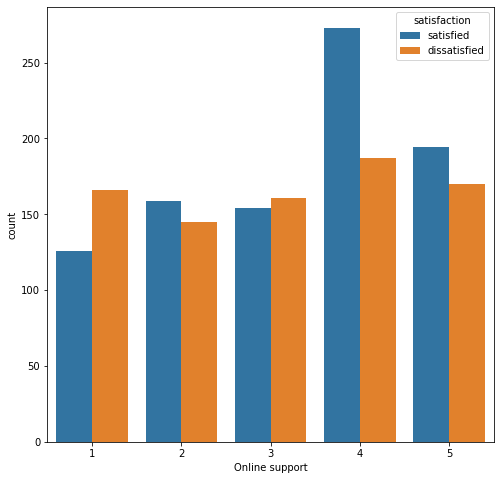

Online support:
4    460
5    364
3    315
2    304
1    292
Name: Online support, dtype: int64


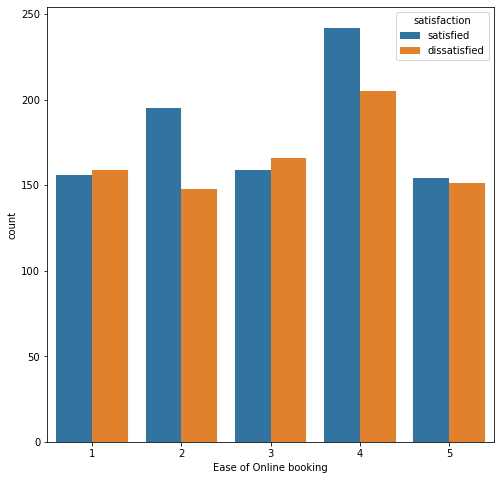

Ease of Online booking:
4    447
2    343
3    325
1    315
5    305
Name: Ease of Online booking, dtype: int64


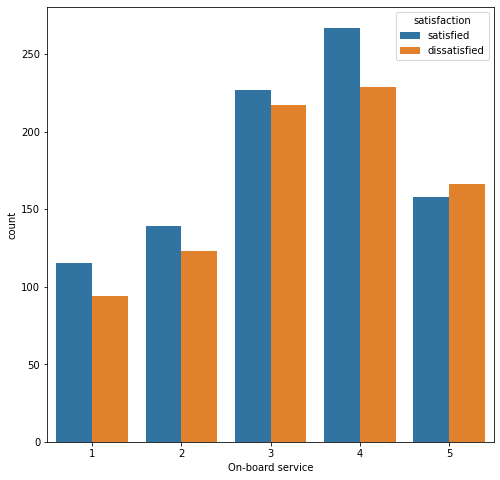

On-board service:
4    496
3    444
5    324
2    262
1    209
Name: On-board service, dtype: int64


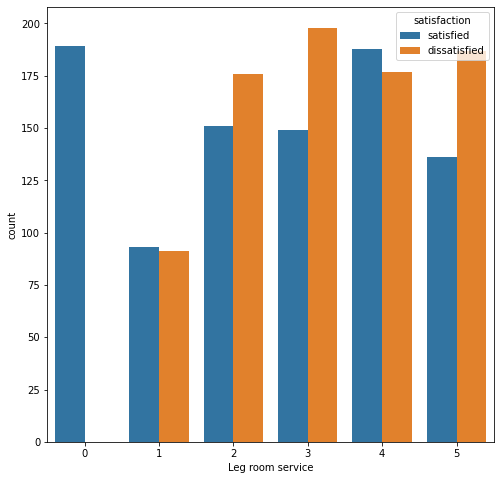

Leg room service:
4    365
3    347
2    327
5    323
0    189
1    184
Name: Leg room service, dtype: int64


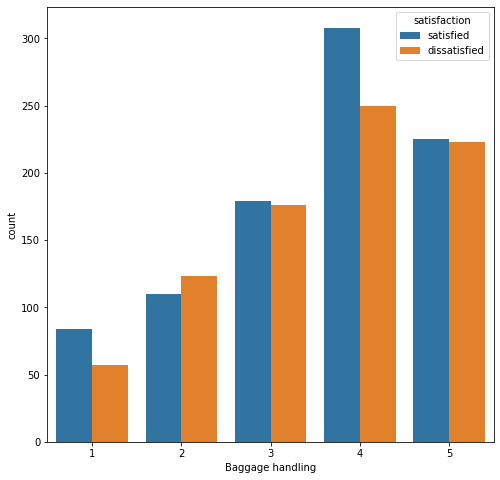

Baggage handling:
4    558
5    448
3    355
2    233
1    141
Name: Baggage handling, dtype: int64


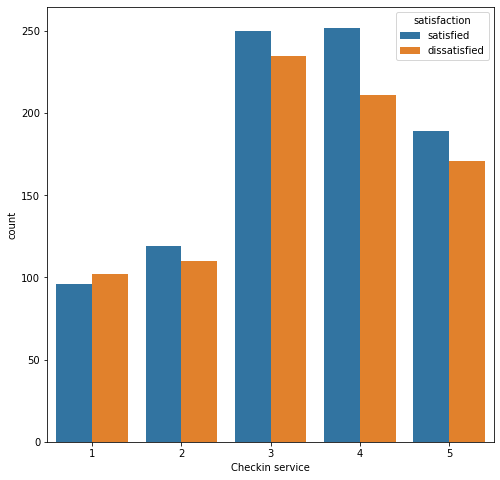

Checkin service:
3    485
4    463
5    360
2    229
1    198
Name: Checkin service, dtype: int64


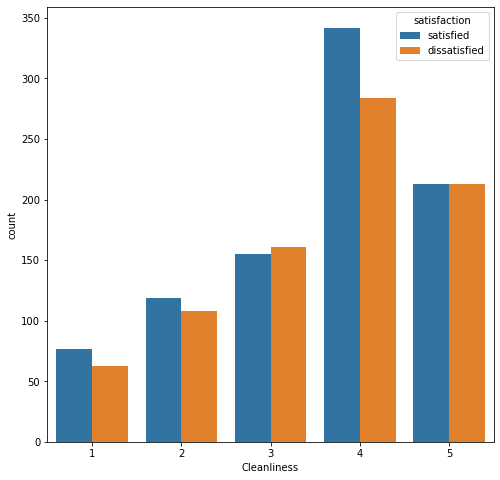

Cleanliness:
4    626
5    426
3    316
2    227
1    140
Name: Cleanliness, dtype: int64


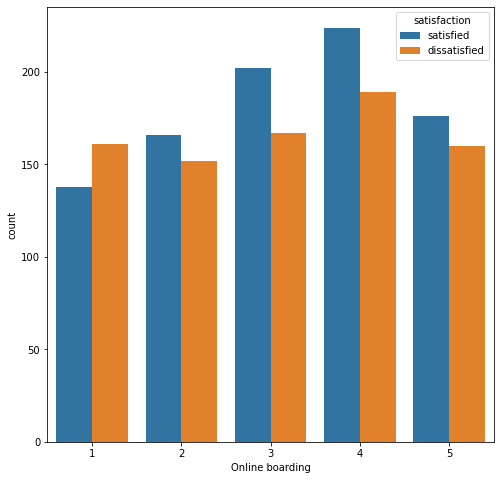

Online boarding:
4    413
3    369
5    336
2    318
1    299
Name: Online boarding, dtype: int64


In [144]:
for i in columnsAsCategorical:
    plot(satisfaction_df, i, "satisfaction")

In [145]:
satisfaction_df['satisfaction'] = pd.get_dummies(satisfaction_df['satisfaction'])

In [146]:
satisfaction_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Gender, Customer Type and Type of Travel are all currently categorical data (dtype: "object"). However, we need to convert it to numerical data in order for our Machine Learning model(s) to be able understand the data.

In [147]:
satisfaction_df['Gender'] = pd.get_dummies(satisfaction_df['Gender'])
satisfaction_df['Customer Type'] = pd.get_dummies(satisfaction_df['Customer Type'])
satisfaction_df['Type of Travel'] = pd.get_dummies(satisfaction_df['Type of Travel'])

In [148]:
satisfaction_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,65,0,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,0,0,1,47,0,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,0,1,1,15,0,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,0,1,1,60,0,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,0,1,1,70,0,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


The class feature takes more than two values which are Eco, Business, Eco Plus. A single dummy variable cannot represent all possible values. I used one hot encodding. 

In [149]:
satisfaction_df.loc[satisfaction_df['Class'] == "Eco", 'ClassEco'] = 1
satisfaction_df.loc[satisfaction_df['Class'] != "Eco", 'ClassEco'] = 0
satisfaction_df.loc[satisfaction_df['Class'] == "Business", 'ClassBusiness'] = 1
satisfaction_df.loc[satisfaction_df['Class'] != "Business", 'ClassBusiness'] = 0
satisfaction_df.loc[satisfaction_df['Class'] == "Eco Plus", 'ClassEcoPlus'] = 1
satisfaction_df.loc[satisfaction_df['Class'] != "Eco Plus", 'ClassEcoPlus'] = 0
satisfaction_df = satisfaction_df.drop(satisfaction_df.columns[5], axis = 1)

In [150]:
satisfaction_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,ClassEco,ClassBusiness,ClassEcoPlus
0,0,1,1,65,0,265,0,0,0,2,...,0,3,5,3,2,0,0.0,1.0,0.0,0.0
1,0,0,1,47,0,2464,0,0,0,3,...,4,4,2,3,2,310,305.0,0.0,1.0,0.0
2,0,1,1,15,0,2138,0,0,0,3,...,3,4,4,4,2,0,0.0,1.0,0.0,0.0
3,0,1,1,60,0,623,0,0,0,3,...,0,1,4,1,3,0,0.0,1.0,0.0,0.0
4,0,1,1,70,0,354,0,0,0,3,...,0,2,4,2,5,0,0.0,1.0,0.0,0.0


In [151]:
satisfaction_df['Arrival Delay in Minutes'].replace(np.NaN, satisfaction_df['Arrival Delay in Minutes'].mean(), inplace=True)
satisfaction_df['Arrival Delay in Minutes'].isnull().sum()

0

I chosed mean imputation for handling because of many reason;

* There is few missing data so I did't use drop method. I chosed imputation methods.
* It is easy to use.
* Our feature is categorical and this method valid for discrete data.
* Our new values will always be within the observed data range.

In [152]:
X = satisfaction_df.drop(satisfaction_df.columns[0], axis = 1)
y = satisfaction_df.iloc[:, 0]

In [153]:
a = X.shape
print("Shape of DataFrame is:", a)
pd.DataFrame(X).head(10)

Shape of DataFrame is: (1735, 24)


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,ClassEco,ClassBusiness,ClassEcoPlus
0,1,1,65,0,265,0,0,0,2,2,...,0,3,5,3,2,0,0.0,1.0,0.0,0.0
1,0,1,47,0,2464,0,0,0,3,0,...,4,4,2,3,2,310,305.0,0.0,1.0,0.0
2,1,1,15,0,2138,0,0,0,3,2,...,3,4,4,4,2,0,0.0,1.0,0.0,0.0
3,1,1,60,0,623,0,0,0,3,3,...,0,1,4,1,3,0,0.0,1.0,0.0,0.0
4,1,1,70,0,354,0,0,0,3,4,...,0,2,4,2,5,0,0.0,1.0,0.0,0.0
5,0,1,30,0,1894,0,0,0,3,2,...,4,5,5,4,2,0,0.0,1.0,0.0,0.0
6,1,1,66,0,227,0,0,0,3,2,...,0,5,5,5,3,17,15.0,1.0,0.0,0.0
7,0,1,10,0,1812,0,0,0,3,2,...,3,4,5,4,2,0,0.0,1.0,0.0,0.0
8,1,1,56,0,73,0,0,0,3,5,...,0,1,5,4,4,0,0.0,0.0,1.0,0.0
9,0,1,22,0,1556,0,0,0,3,2,...,4,5,3,4,2,30,26.0,1.0,0.0,0.0


In [154]:
a = y.shape
print("Shape of DataFrame is:", a)
pd.DataFrame(y).head(10)

Shape of DataFrame is: (1735,)


,satisfaction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(X)
pd.DataFrame(x_scaled, columns=X.columns)


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,ClassEco,ClassBusiness,ClassEcoPlus
0,1.0,1.0,0.743590,0.0,0.031890,0.0,0.0,0.0,0.25,0.4,...,0.0,0.50,1.00,0.50,0.25,0.000000,0.000000,1.0,0.0,0.0
1,0.0,1.0,0.512821,0.0,0.358054,0.0,0.0,0.0,0.50,0.0,...,0.8,0.75,0.25,0.50,0.25,0.725995,0.693182,0.0,1.0,0.0
2,1.0,1.0,0.102564,0.0,0.309700,0.0,0.0,0.0,0.50,0.4,...,0.6,0.75,0.75,0.75,0.25,0.000000,0.000000,1.0,0.0,0.0
3,1.0,1.0,0.679487,0.0,0.084990,0.0,0.0,0.0,0.50,0.6,...,0.0,0.00,0.75,0.00,0.50,0.000000,0.000000,1.0,0.0,0.0
4,1.0,1.0,0.807692,0.0,0.045090,0.0,0.0,0.0,0.50,0.8,...,0.0,0.25,0.75,0.25,1.00,0.000000,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0.0,1.0,0.256410,1.0,0.655740,0.4,0.4,1.0,0.25,0.8,...,0.6,0.25,0.75,0.25,0.75,0.000000,0.000000,0.0,1.0,0.0
1731,1.0,1.0,0.576923,1.0,0.077870,1.0,1.0,1.0,1.00,0.6,...,0.8,0.75,0.75,0.75,0.50,0.063232,0.040909,0.0,1.0,0.0
1732,1.0,1.0,0.564103,1.0,0.078315,0.6,0.6,0.6,0.50,0.6,...,0.8,0.75,0.00,0.75,0.25,0.000000,0.000000,0.0,1.0,0.0
1733,1.0,1.0,0.487179,1.0,0.301543,0.2,0.2,0.2,0.00,0.8,...,0.8,0.75,0.50,0.75,0.50,0.000000,0.000000,0.0,1.0,0.0


I chosed all feature in my models because there is small number of them and our data set isn't big.

In [175]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
test_ratio = 0.10
validation_ratio = 0.20


X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_ratio, shuffle=True, random_state=5)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+validation_ratio), shuffle=True, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(1214, 24)
(174, 24)
(347, 24)


In [176]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,1.0,0.230769,0.0,0.307327,0.0,0.2,0.0,0.25,0.4,...,0.2,0.50,0.00,0.50,0.25,0.000000,0.000000,1.0,0.0,0.0
1,0.0,0.0,0.307692,1.0,0.435924,0.2,0.2,0.2,0.50,0.8,...,1.0,0.75,0.00,0.50,0.75,0.028103,0.013636,1.0,0.0,0.0
2,1.0,0.0,0.256410,1.0,0.380451,0.2,0.2,0.2,0.00,0.2,...,1.0,0.50,0.50,1.00,0.00,0.000000,0.000000,1.0,0.0,0.0
3,0.0,0.0,0.525641,1.0,0.311629,0.2,0.2,0.2,0.00,0.4,...,1.0,0.75,0.75,0.75,0.25,0.000000,0.000000,0.0,1.0,0.0
4,1.0,1.0,0.551282,0.0,0.075794,0.0,1.0,0.0,0.25,0.8,...,0.0,0.25,0.75,0.25,1.00,0.000000,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1.0,1.0,0.051282,0.0,0.199347,0.0,0.4,0.0,0.75,0.6,...,0.2,0.50,0.25,0.75,0.50,0.000000,0.000000,0.0,0.0,1.0
1210,0.0,0.0,0.294872,1.0,0.424948,0.2,0.2,0.2,0.00,0.8,...,0.6,0.75,0.50,1.00,0.75,0.007026,0.013636,0.0,1.0,0.0
1211,1.0,0.0,0.205128,1.0,0.488431,0.2,0.2,0.2,0.25,0.2,...,0.8,1.00,0.75,0.75,0.75,0.000000,0.000000,1.0,0.0,0.0
1212,0.0,0.0,0.346154,1.0,0.277069,0.2,0.2,0.2,0.25,0.8,...,1.0,0.75,0.50,1.00,0.75,0.000000,0.000000,0.0,1.0,0.0


In [177]:
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_valid,y_valid)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}


I did parameter selection for logistic regression using grid search and for this i used the validation set. I used the validation set because I want to avoid overfitting. As you can see our model is giving best accurracy with 100 C values and l2 which is ridge norm as the norm used in normalization.

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty='l2', C=100.0)
lr.fit(X_train, y_train)
predictionsLogistic = lr.predict(X_test)

I build my model with best parameters which are C as 100.0 and penaly as l2.

In [180]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse


Now I will do parameter selection for kNN classification.

In [181]:

K = 0
mse_val= []
dist_euclidean = []
def euclidean():
    for K in range(40):
        K = K+1
        model1 = KNN(n_neighbors = K, metric= 'euclidean')
        model1.fit(X_train, y_train)
        pred=model1.predict(X_valid)
        error = mse(y_valid,pred)
        dist_euclidean.append(error)
        print('Euclidean distance for k= ' , K , 'is:', dist_euclidean[K - 1])


In [182]:
euclidean()

Euclidean distance for k=  1 is: 0.011527377521613832
Euclidean distance for k=  2 is: 0.011527377521613832
Euclidean distance for k=  3 is: 0.010566762728146014
Euclidean distance for k=  4 is: 0.0111671469740634
Euclidean distance for k=  5 is: 0.011296829971181557
Euclidean distance for k=  6 is: 0.012087736151136728
Euclidean distance for k=  7 is: 0.011409751220372875
Euclidean distance for k=  8 is: 0.0111671469740634
Euclidean distance for k=  9 is: 0.01181200412708578
Euclidean distance for k=  10 is: 0.011815561959654178
Euclidean distance for k=  11 is: 0.011836997165789412
Euclidean distance for k=  12 is: 0.011827569644572525
Euclidean distance for k=  13 is: 0.011066964514093754
Euclidean distance for k=  14 is: 0.011086278891960243
Euclidean distance for k=  15 is: 0.011373679154658983
Euclidean distance for k=  16 is: 0.01115588976945245
Euclidean distance for k=  17 is: 0.011437631502846943
Euclidean distance for k=  18 is: 0.011305012986088873
Euclidean distance for k=

In [183]:
M = 0
dist_manhattan = []
def manhattan():
    for M in range(40):
        M = M+1
        model2 = KNN(n_neighbors = M, metric= 'manhattan')
        model2.fit(X_train, y_train)
        pred=model2.predict(X_valid)
        error = mse(y_valid,pred)
        dist_manhattan.append(error)
        print('Manhattan distance for k= ' , M , 'is:', dist_manhattan[M - 1])

In [184]:
manhattan()

Manhattan distance for k=  1 is: 0.008645533141210375
Manhattan distance for k=  2 is: 0.008645533141210375
Manhattan distance for k=  3 is: 0.010246557796990075
Manhattan distance for k=  4 is: 0.009906340057636888
Manhattan distance for k=  5 is: 0.010835734870317006
Manhattan distance for k=  6 is: 0.011367275056035863
Manhattan distance for k=  7 is: 0.01070399341292713
Manhattan distance for k=  8 is: 0.009636167146974064
Manhattan distance for k=  9 is: 0.009357099654890242
Manhattan distance for k=  10 is: 0.009481268011527377
Manhattan distance for k=  11 is: 0.009383856908090597
Manhattan distance for k=  12 is: 0.009386007044508485
Manhattan distance for k=  13 is: 0.009685725491533518
Manhattan distance for k=  14 is: 0.009865906016585307
Manhattan distance for k=  15 is: 0.010195325008005124
Manhattan distance for k=  16 is: 0.010018912103746398
Manhattan distance for k=  17 is: 0.009921920963672805
Manhattan distance for k=  18 is: 0.009988614935781123
Manhattan distance f

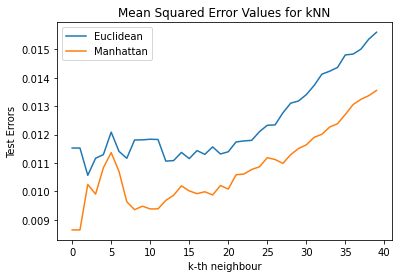

In [185]:
plt.title('Mean Squared Error Values for kNN')
plt.plot(dist_euclidean, label = "Euclidean")
plt.plot(dist_manhattan, label = "Manhattan")
plt.xlabel('k-th neighbour')
plt.ylabel('Test Errors')
plt.legend()

As you can see in the graph of Mean Squared Error Values for kNN, MSE is smallest for manhattan distance when k is equal to 2. So I chosed k as 2. And, I chosed mahattan distance as distance because it is smaller than euclidean.

In [186]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [195]:
clf = KNN(n_neighbors = 2)
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)

Now we will build our kNN classification with k = 2. We chosed it because it gave best accuraccy in parameter selection which is you can see in above.

In [196]:
accuracyLogistic = accuracy_score(y_test, predictionsLogistic)
accuracyKNN = accuracy_score(y_test, test_predict)


print("Classification report of logistic regression: ", accuracyLogistic, "\n")
print(classification_report(y_test,predictionsLogistic))

print("Classification report of kNN Classification: ", accuracyKNN, "\n")
print(classification_report(y_test,test_predict))

Classification report of logistic regression:  0.9885057471264368 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        87
           1       1.00      0.98      0.99        87

    accuracy                           0.99       174
   macro avg       0.99      0.99      0.99       174
weighted avg       0.99      0.99      0.99       174

Classification report of kNN Classification:  0.9827586206896551 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        87
           1       1.00      0.97      0.98        87

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174



Accuracy on validation data are slightly less than 99% for logistic regression and greather less than 98% for kNN Classification, this is a excellent performance. We did parameter selection over validation set so, it could not be said that it overfits training samples.

Confision matrix of Logistic Regression:



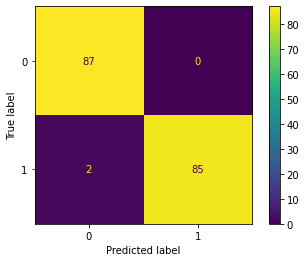

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
print("Confision matrix of Logistic Regression:\n")
plot_confusion_matrix(lr,X_test,y_test)

Accuracy = (85+87)/174

Error rate = (0+2)/174

Precision = 85/(85+0)

Recall = 85/(85+2)


*As you can see we predicated negative truth value excellent. We predicated positive truth value quite good but there is small error we predicated two positive truth value as false.

Confision matrix of kNN Classification:



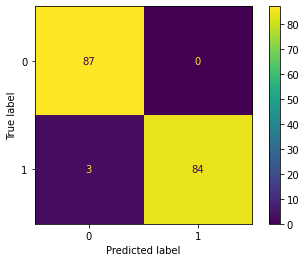

In [202]:
print("Confision matrix of kNN Classification:\n")
plot_confusion_matrix(clf,X_test,y_test)

Accuracy = (84+87)/174

Error rate = (0+3)/174

Precision = 84/(84+0)

Recall = 84/(84+3)

*As you can see we predicated negative truth value excellent.
We predicated positive truth value quite good but there is small error we predicated one positive truth value as false.

In [203]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

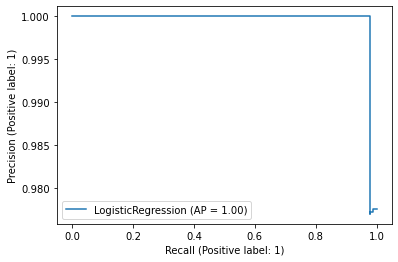

In [204]:
plot_precision_recall_curve(lr,X_test,y_test)

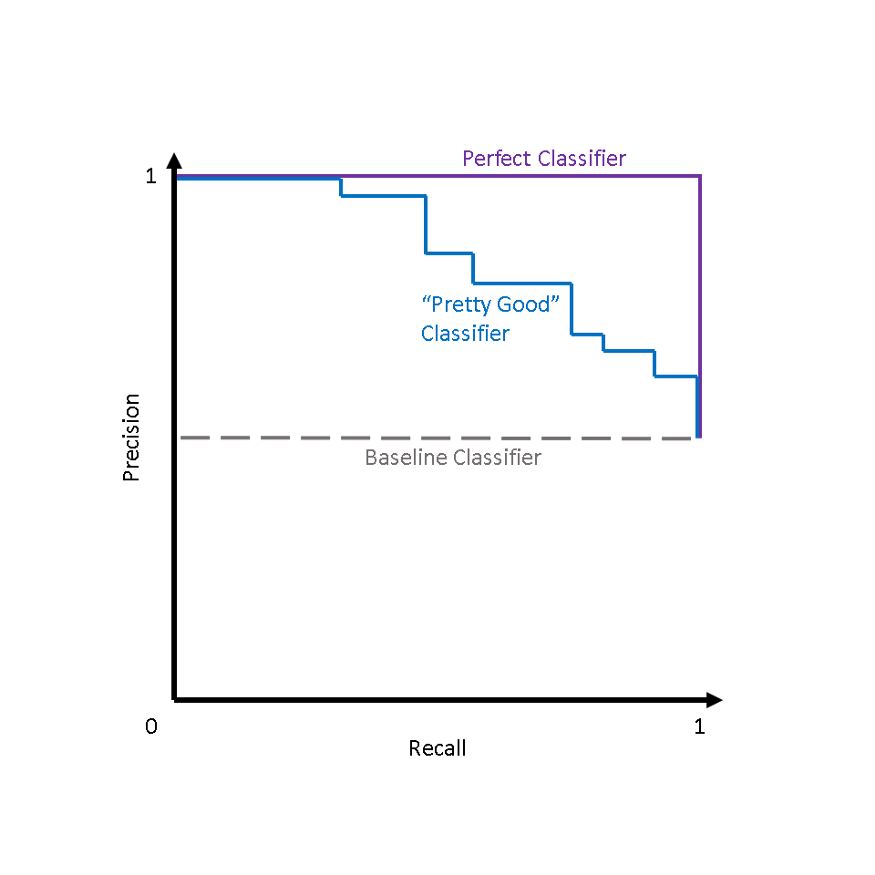


As you can see our model's precision recall curve like perfect model. Also, you can look area under the curve for performance. High area means good model and small area means bad model.Our model has high area. Also you should notice that average precision is equal to one. In perfect models average precision is equal one. 

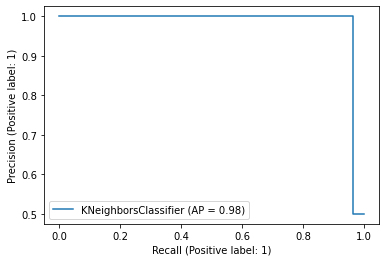

In [201]:
plot_precision_recall_curve(clf,X_test,y_test)

This model is as good as logistic regression so I will write same comment for this model too. As you can see our model's precision recall curve like perfect model. Also you can look area under the curve for performance. High area means good model and small area means bad model. Our model has high area. Also you should notice that average precision is equal to 0.98. In perfect models average precision is equal one.

-You should notice that AP of logistic regression is greather than AP of kNN classification. Logistic regression is giving more correct prediction than kNN classification. Also error rate and recall of kNN classification are greather than logistic regression's.